In [ ]:
!pip install pyLDAvis

In [27]:
import gensim
import nltk
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF,LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import warnings
from operator import itemgetter

warnings.filterwarnings('ignore')

%matplotlib inline

nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!python -m spacy download en_core_web_lg

In [1]:
import spacy
import en_core_web_lg

nlp =en_core_web_lg.load()

In [3]:
moby_dick = nltk.corpus.gutenberg.sents('melville-moby_dick.txt')

In [6]:
from tqdm.notebook import tqdm
def clean_text(corpus):
  cleaned_corpus=[]
  for sent in tqdm(corpus):
    doc=nlp(" ".join(sent))
    cleaned_sent=[]
    for token in doc:
      if re.match(r'[^\W\d]*$', token.text) and token.text not in stop_words:
        cleaned_sent.append(token.lemma_.lower())
    cleaned_corpus.append(cleaned_sent)
  return cleaned_corpus

In [7]:
moby_dick=clean_text(moby_dick)

In [8]:
moby_dick=[" ".join(sent) for sent in moby_dick]

In [9]:
tfidf=TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
).fit(moby_dick)
tfidf_corpus=tfidf.transform(moby_dick)

In [10]:
nmf = NMF(
    n_components=10,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf_corpus)
nmf_data=nmf.transform(tfidf_corpus)

In [11]:
top_words=[]
n_top_words=10
for comp in nmf.components_:
  ind=np.argsort(comp)[::-1]
  top_words.append(np.array(tfidf.get_feature_names())[ind[:10]])

In [12]:
top_words

[array(['chapter', 'folio chapter', 'folio', 'octavo chapter', 'octavo',
        'duodecimo', 'iii', 'ii', 'chapter pron', 'subject'], dtype='<U18'),
 array(['pron', 'say', 'think', 'pron think', 'say pron', 'pron say',
        'pron see', 'know', 'pron know', 'tell'], dtype='<U18'),
 array(['man', 'ahab', 'one', 'like', 'old', 'ship', 'and', 'go', 'boat',
        'upon'], dtype='<U18'),
 array(['oh', 'oh oh', 'life', 'oh ye', 'god', 'starbuck', 'thou', 'sweet',
        'pip', 'oh thou'], dtype='<U18'),
 array(['the', 'the whale', 'of', 'the ship', 'of the', 'ship', 'shark',
        'deck', 'the boat', 'the pequod'], dtype='<U18'),
 array(['what', 'say', 'what say', 'fish', 'remain', 'what matter',
        'matter', 'mean', 'want', 'fast fish'], dtype='<U18'),
 array(['ye', 'see', 'ye see', 'look', 'ye ye', 'say', 'look ye', 'do',
        'say ye', 'man'], dtype='<U18'),
 array(['but', 'but pron', 'look', 'come', 'matter', 'still', 'yet',
        'mean', 'thing', 'say'], dtype='<U18'),

In [15]:
vectorizer = TfidfVectorizer(min_df=3,
    max_df=0.85,
    max_features=25000,
    ngram_range=(1, 2), stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(moby_dick)
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=10, max_iter=15, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


In [14]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      32.420952   8.115230       1        1  23.451823
8       0.648955  71.707100       2        1  20.612687
7      71.019684   9.971006       3        1  12.050039
4       3.785981  33.185135       4        1  10.271832
2     -42.666500  -9.222070       5        1   7.516697
0      -3.621689 -43.526516       6        1   6.601902
5      -3.632402  -4.171708       7        1   6.231335
1     -36.584400  35.804413       8        1   4.533513
3      44.391380  50.615383       9        1   4.406186
9      40.235809 -31.591665      10        1   4.323986, topic_info=          Term        Freq       Total Category  logprob  loglift
1120   chapter  121.000000  121.000000  Default  30.0000  30.0000
326       ahab   90.000000   90.000000  Default  29.0000  29.0000
6766     whale  156.000000  156.000000  Default  28.0000  28.0000
573        aye   42.000000   42.000000  Default  27.0000  27.0000
789       boat   69.000000   69.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
3902    mighty    7.674932   12.204461  Topic10  -5.0066   2.6772
5775   squeeze    4.232400    6.458742  Topic10  -5.6018   2.7183
5813  starbuck   14.023372   47.838069  Topic10  -4.4039   1.9139
2803     heart    7.930523   24.562892  Topic10  -4.9739   2.0105
3026       iii    3.779430    5.628363  Topic10  -5.7150   2.7427

[507 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.561230  -pron-
0         2  0.126119  -pron-
0         3  0.053601  -pron-
0         4  0.097742  -pron-
0         5  0.025224  -pron-
...     ...       ...     ...
7022      1  0.483932    year
7022      4  0.439938    year
7022      9  0.043994    year
7029      1  0.901801     yes
7029      4  0.047463     yes

[718 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 8, 5, 3, 1, 6, 2, 4, 10])

## Gensim LDA

In [17]:
moby_dick=[sent.split(" ")for sent in moby_dick]

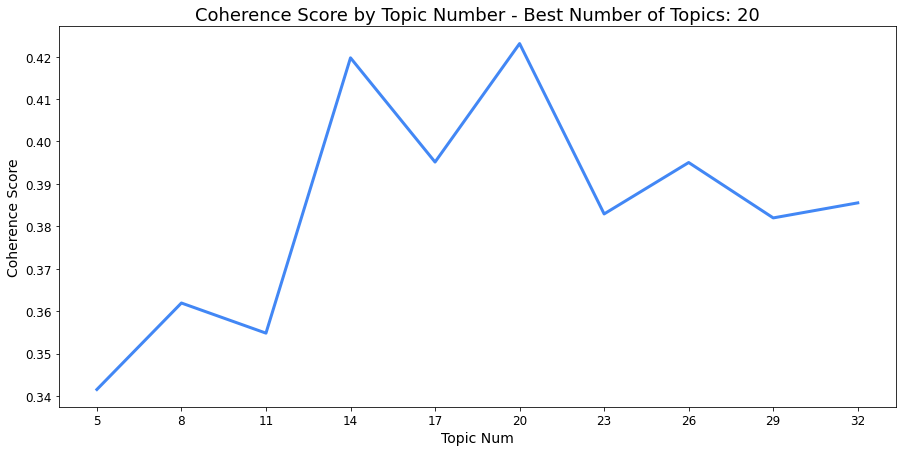

In [32]:

dictionary = Dictionary(moby_dick)

dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

corpus = [dictionary.doc2bow(text) for text in moby_dick]
num_topics=list(np.arange(5, 35, 3))
coherence_scores = []
for n in num_topics:  
  lda = gensim.models.LdaModel(corpus, num_topics=n)
    # Run the coherence model to get the score

  cm = CoherenceModel(
        model=lda,
        texts=moby_dick,
        dictionary=dictionary,
        coherence='c_v'
    )
    
  coherence_scores.append(round(cm.get_coherence(), 5))
    
# Get the number of topics with the highest coherence score
scores = list(zip(num_topics, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    num_topics,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(num_topics) + 1, 3), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

'one'

In [34]:
lda = gensim.models.LdaModel(corpus, num_topics=15)
lda.sh()

array([[6.02793625e-06, 6.02793671e-06, 6.02793079e-06, ...,
        2.03002510e-05, 6.02794171e-06, 1.94523909e-05],
       [1.18152166e-05, 1.18152166e-05, 1.18152020e-05, ...,
        1.09276290e-04, 1.18152348e-05, 2.33122009e-05],
       [8.22514176e-06, 8.22514085e-06, 8.22513448e-06, ...,
        9.64914288e-05, 1.65484613e-04, 2.11836614e-05],
       ...,
       [8.52904122e-06, 8.52904122e-06, 8.52903122e-06, ...,
        3.58570614e-05, 7.34525311e-05, 8.52903213e-06],
       [7.93555773e-06, 7.93555773e-06, 7.93554409e-06, ...,
        7.93556228e-06, 4.29856067e-04, 7.93675372e-06],
       [1.01348683e-02, 1.01348683e-02, 1.19266497e-05, ...,
        2.50042707e-04, 2.58553395e-04, 1.19266515e-05]], dtype=float32)

In [43]:
x=lda.show_topics(num_topics=15, num_words=10,formatted=False)
topics_words = [(tp[0], [dictionary[int(wd[0])] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

0::['one', 'hearse', 'side', 'ahab', 'head', 'sink', 'like', '-pron-', 'aloft', 'whale']
1::['-pron-', 'give', 'helm', 'astern', 'sun', 'wheel', 'hate', 'side', 'solid', 'copper']
2::['boat', 'crew', 'instant', '-pron-', 'bowsman', 'stubb', 'die', 'seize', 'day', 'cry']
3::['the', 'whale', 'ship', 'buoy', 'lonely', 'topmost', 'sea', '-pron-', 'life', 'swiftly']
4::['-pron-', 'thou', 'ship', 'thee', 'sail', 'one', 'chase', 'yard', 'draw', 'since']
5::['ye', 'ahab', 'shoot', '-pron-', 'sink', 'spar', 'bird', 'clear', 'pool', 'ere']
6::['-pron-', 'why', 'day', 'go', 'shark', 'sea', 'salt', 'three', 'mother', 'child']
7::['oh', '-pron-', 'fly', 'coffin', 'one', 'death', 'neck', 'sir', 'life', 'run']
8::['thou', '-pron-', 'forward', 'another', 'whole', 'foul', 'button', 'vacant', 'bound', 'groove']
9::['beak', 'a', 'thee', 'whale', 'ship', 'god', 'oar', 'great', 'thus', 'tub']
10::['-pron-', 'hammer', 'thee', 'circle', 'round', 'towards', 'last', 'like', 'slowly', 'hull']
11::['cherry', 'fl

## Topic 2 Vec ( Transformer based)

In [ ]:
!pip install top2vec
!pip install top2vec[sentence_transformers]
!pip install top2vec[sentence_encoders]

In [47]:
from top2vec import Top2Vec

In [48]:
moby_dick=[" ".join(sent) for sent in moby_dick]

In [49]:
model = Top2Vec(moby_dick, embedding_model='universal-sentence-encoder')

2021-06-01 09:49:19,668 - top2vec - INFO - Pre-processing documents for training
2021-06-01 09:49:20,233 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloading https://tfhub.dev/google/universal-sentence-encoder/4: 840.00MB
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
2021-06-01 09:49:45,799 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-06-01 09:49:48,383 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-06-01 09:50:26,781 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
20

In [50]:
model.get_num_topics()

6

In [51]:
topic_words, word_scores, topic_nums = model.get_topics(6)

In [52]:
topic_words

array([['ahab', 'harpoon', 'whaling', 'whale', 'nantucket', 'mast',
        'sail', 'seaman', 'blow', 'aye', 'drop', 'pron', 'oar',
        'leviathan', 'sit', 'lay', 'ere', 'shark', 'dick', 'gaze',
        'bear', 'speak', 'moby', 'sailor', 'cry', 'bow', 'stand', 'tail',
        'pequod', 'aloft', 'strike', 'throw', 'swim', 'catch',
        'creature', 'deep', 'rise', 'captain', 'wonder', 'spout', 'eye',
        'mighty', 'say', 'seek', 'glance', 'stern', 'vessel', 'lose',
        'wave', 'thou'],
       ['oh', 'ye', 'well', 'good', 'way', 'so', 'there', 'mate', 'that',
        'fine', 'great', 'man', 'this', 'thing', 'help', 'right', 'what',
        'indeed', 'little', 'thou', 'fellow', 'aye', 'mr', 'now', 'not',
        'then', 'word', 'close', 'much', 'thee', 'god', 'dick',
        'curious', 'here', 'moment', 'enough', 'on', 'far', 'point',
        'sir', 'know', 'thus', 'hard', 'yet', 'no', 'new', 'but', 'look',
        'want', 'yes'],
       ['ye', 'on', 'way', 'not', 'of', 'so'